In [1]:
from large_gcs.geometry.polyhedron import Polyhedron
from large_gcs.geometry.ellipsoid import Ellipsoid
from large_gcs.geometry.point import Point
from large_gcs.graph.graph import Graph, Edge
import matplotlib.pyplot as plt

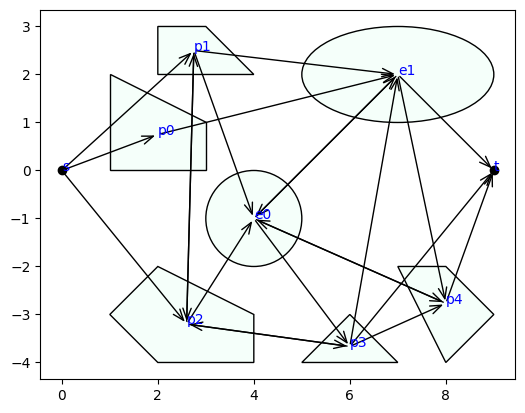

In [2]:
# Convex sets
points = (
    Point((0, 0)),
    Point((9, 0)),
)

polyhedra = (
    Polyhedron(([1, 0], [1, 2], [3, 1], [3, 0])),
    Polyhedron(([4, 2], [3, 3], [2, 2], [2, 3])),
    Polyhedron(([2, -2], [1, -3], [2, -4], [4, -4], [4, -3])),
    Polyhedron(([5, -4], [7, -4], [6, -3])),
    Polyhedron(([7, -2], [8, -2], [9, -3], [8, -4])),
)
ellipsoids = (
    Ellipsoid((4, -1), ([1, 0], [0, 1])),
    Ellipsoid((7, 2), ([.25, 0], [0, 1])),
)

sets = points + polyhedra + ellipsoids

# Vertex names
vertex_names = ['s', 't']
vertex_names += [f'p{i}' for i in range(len(polyhedra))]
vertex_names += [f'e{i}' for i in range(len(ellipsoids))]

# Add convex sets to graph
G = Graph()
G.add_vertices_from_sets(sets, names = vertex_names)

# Edges
edges = {
    's': ('p0', 'p1', 'p2'),
    'p0': ('e1',),
    'p1': ('p2', 'e0', 'e1'),
    'p2': ('p1', 'p3', 'e0'),
    'p3': ('t', 'p2', 'p4', 'e1'),
    'p4': ('t', 'e0'),
    'e0': ('p3', 'p4', 'e1'),
    'e1': ('t', 'p4', 'e0')
}
for u, vs in edges.items():
    for v in vs:
        G.add_edge(Edge(u, v))

# draw convex sets and edges
plt.figure()
G.plot_sets()
G.plot_edges()
G.plot_set_labels()
plt.show()